In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 120

# **Zero Coupon Bonds**

**A zero coupon bond is a debt security that does not pay any interest. Zero coupon bonds are sold at a discount to their par value. At the zero coupon bond's maturity date, the par value is paid out to the debt holder.**

**The difference between the purchase price of a zero-coupon bond and the par value indicates the investor's return.**

$\text{Zero Coupon Bond Price =} \Large{\frac{Par}{(1+\frac{r}{f})^{(ft)}}},$ $\text{where $Par$ is the value of the bond's payout at maturity, $r$ is the market discount rate, $f$ is the compounding frequency and $t$ is the time to maturity}$

<sup>Source: [Fixed Income Analysis Workbook (CFA Institute Investment Series)](https://www.amazon.com/Income-Analysis-Workbook-Institute-Investment/dp/1119627443) by Barbara S. Petitt<sup/>
    
<sup>Source: [Zero-Coupon Bond: Definition, How It Works, and How To Calculate](https://www.investopedia.com/terms/z/zero-couponbond.asp#:~:text=These%20bonds%20are%20issued%20at,semiannually%2C%20at%20a%20stated%20yield.) by James Chen from Investopedia.com<sup/>

## **Zero Coupon Bonds in the Market**

**A popular form of zero coupon bonds are treasury STRIPS (Separate Trading of Registered Interest and Principal of Securities). A treasury bonds coupon payments and principal payment (par value) are separated to create a STRIP. STRIPS are backed by the full faith and credit of the U.S. government meaning the risk of default is very low.**

**Companies can also issue zero coupon bonds, for example Apple Inc. sold 6 year zero coupon bonds in Europe. However there is significantly more risk in zero coupon bonds issued by companies because companies are more likely to default on debts compared to countries like the United States.**

<sup>Source: [Treasury STRIPS (T-Strips): Definition and How to Invest](https://www.investopedia.com/terms/t/treasurystrips.asp#toc-advantages-of-treasury-strips) by James Chen from Investopedia.com<sup/>
    
<sup>Source: [Apple Is Paying Less Than Ever to Borrow in Europe](https://www.barrons.com/articles/apple-is-paying-less-than-ever-to-borrow-in-europe-51573993800) by Alexandra Scaggs from Barron's<sup/>

In [3]:
def zero_bond_pricer(par_value, discount_rate, years, compounding_period):
    
    if compounding_period.lower() == 'annual':
        compound_value = 1
    elif compounding_period.lower() == 'semi annual':
        compound_value = 2
    elif compounding_period.lower() == 'quarterly':
        compound_value = 4
    elif compounding_period.lower() == 'monthly':
        compound_value = 12
        
    z_bond_value = par_value/(1+discount_rate/compound_value)**(compound_value*years)
    
    return z_bond_value

## **Zero Coupon Bond Example**

**As an analyst, we are tasked with pricing a zero coupon bond maturing in 10 years with a par value of $100. The market's discount rate is 5% and the portfolio manager wants us to calculate the bond's value using semi-annual compounding.**

In [4]:
zero_bond_pricer(100,.05,10,'semi annual')

61.02709428588309

# **Rate Sensitivity of Zero Coupon Bonds**

**As with other bonds, when interest rates rise, the value of zero coupon bonds fall because investor now require higher payouts. Because zero coupon bonds do not make intermediate coupon payments, they are more sensitive to interest rate changes than coupon paying bonds.**

<sup>Source: [Advantages and Risks of Zero-Coupon U.S. Treasury Bonds
](https://www.investopedia.com/articles/investing/062513/all-about-zero-coupon-bonds.asp) by Lisa Smith from Investopedia.com<sup/>

In [5]:
def bond_pricer(par_value,discount_rate,coupon_rate,years,compounding_period):
    
    '''Function that estimates the value of a coupon paying bond.

    Parameters
    ----------
    par_value: Face value of the bond that is paid out at the bond maturity date
    discount_rate: Market discount rate for the bond cash flows
    coupon_rate: Annual rate of the face value that is paid to the holder of the bond
    years: Number of years to the bond's maturity
    compounding_period: Frequency of the bond's payout, the frequencies include: annual, 
    semi annual, quarterly and monthly

    Returns
    -------
    bond_value: Returns the estimated value of the bond
    '''
     
    if compounding_period.lower() == 'annual':
        compound_value = 1
    elif compounding_period.lower() == 'semi annual':
        compound_value = 2
    elif compounding_period.lower() == 'quarterly':
        compound_value = 4
    elif compounding_period.lower() == 'monthly':
        compound_value = 12
        
    period_payments = [par_value * (coupon_rate/compound_value)] * (compound_value * years)
    period_payments[-1] += par_value
    periods = range(1,(years*compound_value)+1)
    
    pv_of_payments = [payment/(1+discount_rate/compound_value)**period for payment,period in zip(period_payments,periods)]
    bond_value = sum(pv_of_payments)
    
    return bond_value

In [7]:
z_bond_list = [zero_bond_pricer(100,rate,3,'annual') for rate in np.arange(0,.2025,.025)]
bond_list = [bond_pricer(100,rate,.05,3,'annual') for rate in np.arange(0,.2025,.025)]

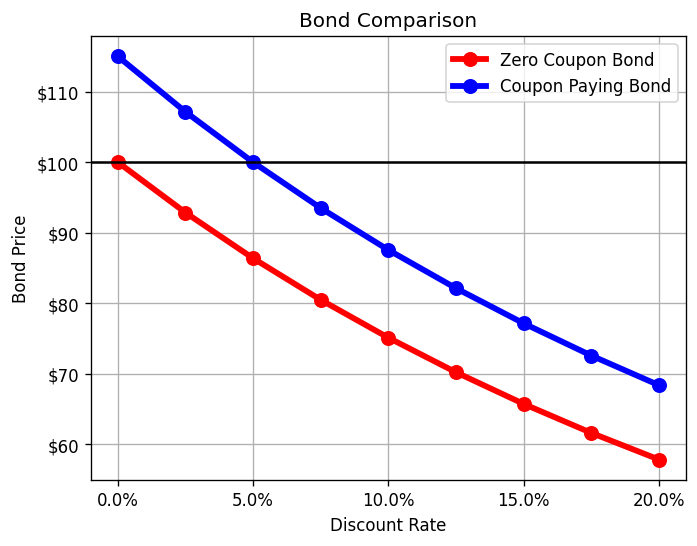

In [8]:
plt.plot(np.arange(0,.2025,.025),z_bond_list,color='red',marker='o',lw=3.5,markersize=8,label='Zero Coupon Bond')
plt.plot(np.arange(0,.2025,.025),bond_list,color='blue',marker='o',lw=3.5,markersize=8,label='Coupon Paying Bond')
plt.axhline(100,color='black')
plt.xlabel('Discount Rate')
plt.xticks(np.arange(0,.25,.05))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Bond Price')
plt.gca().yaxis.set_major_formatter('${x:1.0f}')
plt.title('Bond Comparison')
plt.grid()
plt.legend();

# **References and Additional Learning**

## **Articles**

- **[Advantages and Risks of Zero-Coupon U.S. Treasury Bonds
](https://www.investopedia.com/articles/investing/062513/all-about-zero-coupon-bonds.asp) by Lisa Smith from Investopedia.com**

- **[Apple Is Paying Less Than Ever to Borrow in Europe](https://www.barrons.com/articles/apple-is-paying-less-than-ever-to-borrow-in-europe-51573993800) by Alexandra Scaggs from Barron's**

- **[Treasury STRIPS (T-Strips): Definition and How to Invest](https://www.investopedia.com/terms/t/treasurystrips.asp#toc-advantages-of-treasury-strips) by James Chen from Investopedia.com**

- **[Zero-Coupon Bond: Definition, How It Works, and How To Calculate](https://www.investopedia.com/terms/z/zero-couponbond.asp#:~:text=These%20bonds%20are%20issued%20at,semiannually%2C%20at%20a%20stated%20yield.) by James Chen from Investopedia.com**

## **Textbook**

- **[Fixed Income Analysis Workbook (CFA Institute Investment Series)](https://www.amazon.com/Income-Analysis-Workbook-Institute-Investment/dp/1119627443) by Barbara S. Petitt**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**